## Question 4: Exercice de classification sur Python

L'exercice utilisera le fichier de données Weekly.
Ce fichier comprend 1089 observations hebdomadaires sur 21 ans de 1990 à 2010 pour 9 variables. L'objectif est de prédire si le SP500 va augmenter ou baisser (la variable Direction prend la valeur up si la marché monte et down si le marché baisse).

<ol type="a">
  <li>Produisez des statistiques descriptives et graphiques pour résumer les données dans le fichier Weekly. Voyez-vous des relations particulières?</li>
  <li>On utilise le fichier de données complet pour estimer un modèle logit avec Direction comme variable dépendante et les cinq retards Lag1 à Lag5 et Volume comme prédicteurs. Imprimez les estimateurs, leur écart-type, p-valeur etc. Quelles sont les coeffcients significativement différents de zéro?</li>
  <li>Calculez la matrice de confusion et la fraction de prédictions correctes. Expliquez ce que la matrice de confusion vous dit sur les types d'erreurs commises par la régression logistique.</li>
  <li>Maintenant estimez le modèle logit en utilisant comme données d'entrainement la période de 1990 à 2008 avec Lag2 comme seul prédicteur. Calculez la matrice de confusion et la fraction de prédictions correctes sur l'échantillon test (c'est-à-dire les données de 2009 à 2010).</li>
  <li>Répétez (d) avec LDA.</li>
  <li>Répétez (d) avec QDA.</li>
  <li>Répétez (d) avec KNN avec K = 1.</li>
  <li>Expérimentez différentes combinaisons des prédicteurs, incluant des transformations et interactions. Reportez les estimateurs et la matrice de confusion pour la méthode qui semble donner les meilleurs résultats sur l'échantillon test. Expérimentez aussi plusieurs valeurs de K pour KNN.</li>
</ol>

# Solution


In [ ]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.style.use('seaborn-white')

pd.set_option('display.precision', 2) # number precision for pandas
pd.set_option('display.max_rows', 12)
pd.set_option('display.float_format', '{:20,.2f}'.format) # get rid of scientific notation
plt.style.use('seaborn')

###Chargement des données


In [ ]:
#Pour charger les données, j'ai sauvegardé le fichier weekly.csv sur mon dépôt github.

#Copier le lien and l'enregistrer comme une variable 'string' appelée url.
url = 'https://raw.githubusercontent.com/BeddiAhmed/Megadonnees/main/weekly.csv'

#Charger url dans Pandas read_csv pour enregistrer les données dans un Pandas dataframe.
Weekly = pd.read_csv(url, index_col=0)

Weekly.Direction = Weekly.Direction.astype('category')
Weekly.head()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
1,1990,0.82,1.57,-3.94,-0.23,-3.48,0.15,-0.27,Down
2,1990,-0.27,0.82,1.57,-3.94,-0.23,0.15,-2.58,Down
3,1990,-2.58,-0.27,0.82,1.57,-3.94,0.16,3.51,Up
4,1990,3.51,-2.58,-0.27,0.82,1.57,0.16,0.71,Up
5,1990,0.71,3.51,-2.58,-0.27,0.82,0.15,1.18,Up


###a) Statistiques descriptives et graphiques

In [ ]:
#Statistiques descriptives
Weekly.describe()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
count,"1,089.00","1,089.00","1,089.00","1,089.00","1,089.00","1,089.00","1,089.00","1,089.00"
mean,"2,000.05",0.15,0.15,0.15,0.15,0.14,1.57,0.15
std,6.03,2.36,2.36,2.36,2.36,2.36,1.69,2.36
min,"1,990.00",-18.20,-18.20,-18.20,-18.20,-18.20,0.09,-18.20
25%,"1,995.00",-1.15,-1.15,-1.16,-1.16,-1.17,0.33,-1.15
50%,"2,000.00",0.24,0.24,0.24,0.24,0.23,1.00,0.24
75%,"2,005.00",1.41,1.41,1.41,1.41,1.41,2.05,1.41
max,"2,010.00",12.03,12.03,12.03,12.03,12.03,9.33,12.03


On observe que les variables $Today$, $Lag1$, $Lag2$, $Lag3$, $Lag4$ et $lag5$ ont approximativement les mêmes statistiques desriptives (moyenne = 0.15, ecart-type = 2.36).

In [ ]:
#Correlation
Weekly.corr()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
Year,1.00,-0.03,-0.03,-0.03,-0.03,-0.03,0.84,-0.03
Lag1,-0.03,1.00,-0.07,0.06,-0.07,-0.01,-0.06,-0.08
Lag2,-0.03,-0.07,1.00,-0.08,0.06,-0.07,-0.09,0.06
Lag3,-0.03,0.06,-0.08,1.00,-0.08,0.06,-0.07,-0.07
Lag4,-0.03,-0.07,0.06,-0.08,1.00,-0.08,-0.06,-0.01
Lag5,-0.03,-0.01,-0.07,0.06,-0.08,1.00,-0.06,0.01
Volume,0.84,-0.06,-0.09,-0.07,-0.06,-0.06,1.00,-0.03
Today,-0.03,-0.08,0.06,-0.07,-0.01,0.01,-0.03,1.00


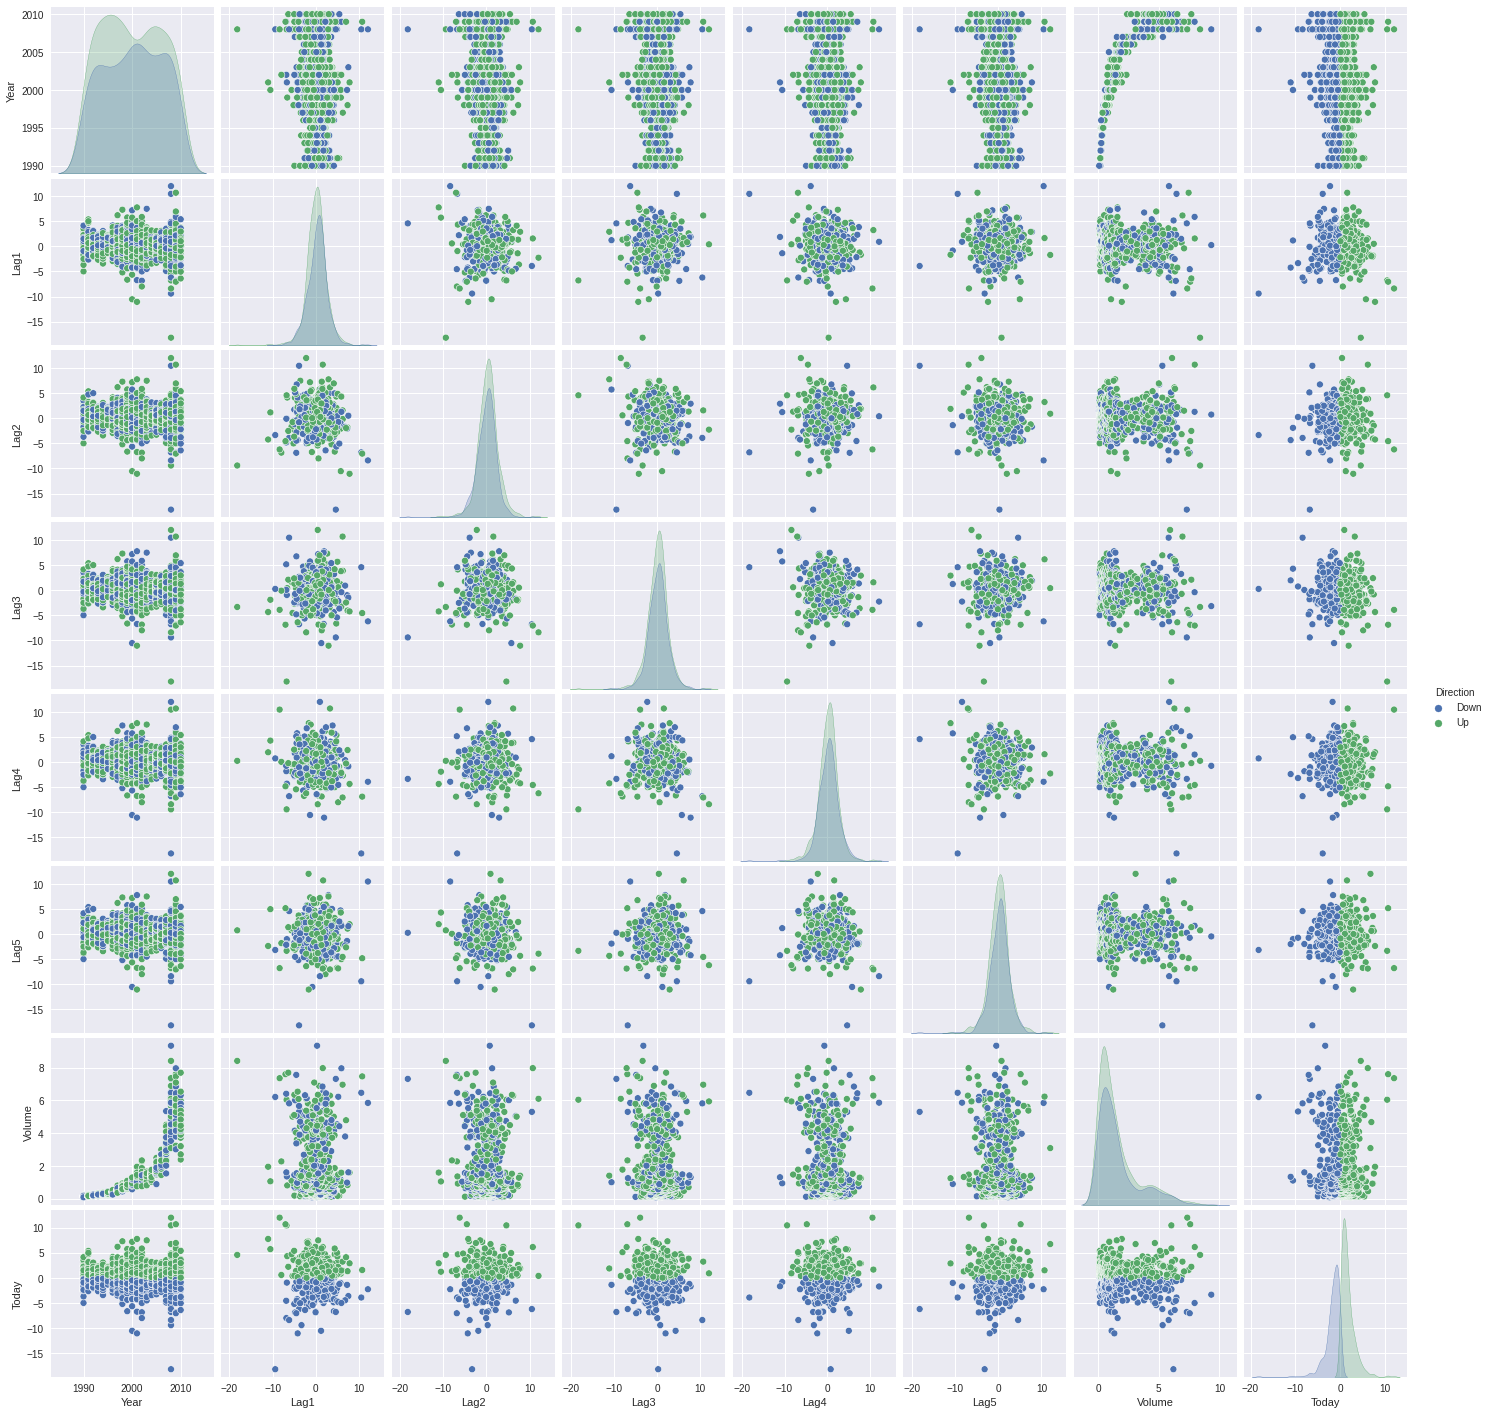

In [ ]:
#Graphiques
sns.pairplot(Weekly, hue='Direction')

On observe que les variables $Year$ et $Volume$ ont une corrélation positive. Aucune corrélation entre les autres variables.

###b) Régression logistique

####Régression logistique avec Scikit-learn

In [ ]:
#Avec Scikit-learn
from sklearn.linear_model import LogisticRegression
X = Weekly.loc[:,'Lag1':'Volume']
Y = Weekly.Direction

lr = LogisticRegression(fit_intercept=True, C=1e+10)
lr_result = lr.fit(X, Y)
print(lr_result.intercept_, lr_result.coef_)

[0.26686253] [[-0.04126771  0.05844169 -0.01606184 -0.02778928 -0.01447421 -0.02274122]]


###Régression logistique avec Statsmodels

In [ ]:
#Avec Statsmodels
import statsmodels.api as sm

X_sm = Weekly.loc[:,'Lag1':'Volume']
Y_sm = pd.get_dummies(Weekly.Direction).iloc[:, 1]

lr_result_sm = sm.Logit(Y_sm, sm.add_constant(X_sm)).fit()
print(lr_result_sm.summary())

Optimization terminated successfully.
         Current function value: 1.925080
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:                     Up   No. Observations:                 1089
Model:                          Logit   Df Residuals:                     1082
Method:                           MLE   Df Model:                            6
Date:                Sat, 11 Feb 2023   Pseudo R-squ.:                     inf
Time:                        22:28:55   Log-Likelihood:                -2096.4
converged:                       True   LL-Null:                        0.0000
Covariance Type:            nonrobust   LLR p-value:                     1.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2669      0.086      3.106      0.002       0.098       0.435
Lag1          -0.0413      0.

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/usr/local/lib/python3.8/dist-packages/statsmodels/discrete/discrete_model.py:3500: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.llf/self.llnull


In [ ]:
print("Coefficeients")
print(lr_result_sm.params)
print()
print("Écart-types")
print(lr_result_sm.bse)
print()
print("p-Valeurs")
print(lr_result_sm.pvalues)

Coefficeients
const                    0.27
Lag1                    -0.04
Lag2                     0.06
Lag3                    -0.02
Lag4                    -0.03
Lag5                    -0.01
Volume                  -0.02
dtype: float64

Écart-types
const                    0.09
Lag1                     0.03
Lag2                     0.03
Lag3                     0.03
Lag4                     0.03
Lag5                     0.03
Volume                   0.04
dtype: float64

p-Valeurs
const                    0.00
Lag1                     0.12
Lag2                     0.03
Lag3                     0.55
Lag4                     0.29
Lag5                     0.58
Volume                   0.54
dtype: float64


$Lag2$ a une p-valeur de $0.03$, c'est-à-dire on peut rejeter l’hypothèse nulle que le coefficient de $Lag2$ est égal à zéro au niveau de $\alpha$ $= 5\%$. <br><br>
Le coefficient de $Lag2$ est le seul ici qui a une p-valeur inférieure à $0.05$  et donc c'est le seul qui est significativement différent de zéro.

###C) Prédiction et matrice de confusion:


In [ ]:
# prediction
pd.DataFrame({'prob_down': lr_result.predict_proba(X)[:, 0], 
              'prob_up': lr_result.predict_proba(X)[:, 1], 
              'pred_class': lr_result.predict(X)}, 
             columns=['prob_down', 'prob_up', 'pred_class'])

,prob_down,prob_up,pred_class
0,0.39,0.61,Up
1,0.40,0.60,Up
2,0.41,0.59,Up
3,0.52,0.48,Down
4,0.38,0.62,Up
...,...,...,...
1084,0.46,0.54,Up
1085,0.50,0.50,Up
1086,0.42,0.58,Up
1087,0.45,0.55,Up


In [ ]:
#Matrice de confusion
from sklearn.metrics import confusion_matrix

matrice_confusion = pd.DataFrame(confusion_matrix(Y, lr_result.predict(X)))
matrice_confusion.columns.name = 'predite'
matrice_confusion.index.name = 'Vraie'
matrice_confusion

predite,0,1
Vraie,,
0,54,430
1,48,557


In [ ]:
vraie_down = np.sum(Weekly["Direction"]=='Down')
vraie_down

484

In [ ]:
vraie_up = np.sum(Weekly["Direction"]=='Up')
vraie_up

605

In [ ]:
## Training accuracy
print('Training accuracy (fraction de prédictions correctes):',(557+54) /1089)

##Taux d'erreur d'entrainement
print('Taux d'+"'" 'erreur (fraction de prédictions pas correctes): ',1-((557+54) /1089))

Training accuracy (fraction de prédictions correctes): 0.5610651974288338
Taux d'erreur (fraction de prédictions pas correctes):  0.43893480257116624


In [ ]:
from sklearn.metrics import accuracy_score

print('Accuracy: ' + str(accuracy_score(Y, lr_result.predict(X))))
print('Training Error: ' + str(1 - accuracy_score(Y, lr_result.predict(X))))

Accuracy: 0.5610651974288338
Training Error: 0.43893480257116624


En total, le SP500 a augmenté en 605 semaines. La régression logistique a predit que SP500 a augmenté en 987 semaines. Parmi ces 987 semaines, en réalité, le SP500 a augmenté en 557 semaines. C'est à dire le taux de vrais positifs est (1-Erreur de type 2): <br>
$557/987 = 0.564$ <br><br>

En total, le SP500 a baissé en 484 semaines. La régression logistique a predit que SP500 a baissé en 102 semaines. Parmi ces 102 semaines, en réalité, le SP500 a baissé en 54 semaines. C'est à dire le taux de vrais negatifs est (specifité): <br>
$54/102 = 0.529$ <br><br>

Donc, on a: <br>
Erreur type1 $= 430/484 = 0.888$ <br><br>
Erreur type-2 $= 1-0.564 = 0.436$ <br><br>

###d) Régression logistique en utilisant comme données d'entrainement la période de 1990 à 2008 avec Lag2 comme seul prédicteur:

In [ ]:
# Création d'un training et un test set
data_train = Weekly.loc[Weekly.Year <= 2008]
data_test = Weekly.loc[Weekly.Year > 2008]

X_train = data_train.loc[:,'Lag2':'Lag2']
Y_train = pd.get_dummies(data_train.Direction).iloc[:, 1]

X_test = data_test.loc[:,'Lag2':'Lag2']
Y_test = pd.get_dummies(data_test.Direction).iloc[:, 1]

lr2_sm = sm.Logit(Y_train, sm.add_constant(X_train)).fit()
print(lr2_sm.summary())

Optimization terminated successfully.
         Current function value: 0.888927
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:                     Up   No. Observations:                  985
Model:                          Logit   Df Residuals:                      983
Method:                           MLE   Df Model:                            1
Date:                Sat, 11 Feb 2023   Pseudo R-squ.:                     inf
Time:                        22:29:25   Log-Likelihood:                -875.59
converged:                       True   LL-Null:                        0.0000
Covariance Type:            nonrobust   LLR p-value:                     1.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2033      0.064      3.162      0.002       0.077       0.329
Lag2           0.0581      0.

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/usr/local/lib/python3.8/dist-packages/statsmodels/discrete/discrete_model.py:3500: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.llf/self.llnull


In [ ]:
#Avec scikit-learn
lr2 = LogisticRegression(fit_intercept=True, C=1e10)
lr2_result = lr2.fit(X_train, Y_train)
print(lr2_result.intercept_, lr2_result.coef_)

[0.20325742] [[0.05809525]]


In [ ]:
# prediction
pd.DataFrame({'prob_down': lr2_result.predict_proba(X_test)[:, 0], 
              'prob_up': lr2_result.predict_proba(X_test)[:, 1], 
              'pred_class': lr2_result.predict(X_test)}, 
             columns=['prob_down', 'prob_up', 'pred_class'])

,prob_down,prob_up,pred_class
0,0.47,0.53,1
1,0.36,0.64,1
2,0.51,0.49,0
3,0.51,0.49,0
4,0.48,0.52,1
...,...,...,...
99,0.45,0.55,1
100,0.46,0.54,1
101,0.41,0.59,1
102,0.43,0.57,1


#Matrice de confusion:

In [ ]:
#Matrice de confusion
from sklearn.metrics import confusion_matrix

matrice_confusion2 = pd.DataFrame(confusion_matrix(Y_test, lr2_result.predict(X_test)))
matrice_confusion.columns.name = 'Predite'
matrice_confusion.index.name = 'Vraie'
matrice_confusion2

,0,1
0,9,34
1,5,56


#Fraction de prédictions correctes:

In [ ]:
print('Accuracy (fraction de prédictions correctes): ' + str(accuracy_score(Y_test, lr2_result.predict(X_test))))
print('Erreur test: ' + str(1 - accuracy_score(Y_test, lr2_result.predict(X_test))))

Accuracy (fraction de prédictions correctes): 0.625
Erreur test: 0.375


#e) Analyse discriminante linéaire (LDA):

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix, classification_report, precision_score

data_train = Weekly.loc[Weekly.Year <= 2008]
data_test = Weekly.loc[Weekly.Year > 2008]

X_train = data_train.loc[:,'Lag2':'Lag2']
Y_train = pd.get_dummies(data_train.Direction).iloc[:, 1]

X_test = data_test.loc[:,'Lag2':'Lag2']
Y_test = pd.get_dummies(data_test.Direction).iloc[:, 1]

lda = LinearDiscriminantAnalysis()
lda_fit = lda.fit(X_train, Y_train)
print(lda_fit.priors_)

[0.44771574 0.55228426]


In [ ]:
print(lda_fit.means_)

[[-0.03568254]
 [ 0.26036581]]


In [ ]:
print(lda_fit.coef_)

[[0.05768451]]


In [ ]:
# prediction
pd.DataFrame({'prob_down': lda_fit.predict_proba(X_test)[:, 0], 
              'prob_up': lda_fit.predict_proba(X_test)[:, 1], 
              'pred_class': lda_fit.predict(X_test)}, 
             columns=['prob_down', 'prob_up', 'pred_class'])

,prob_down,prob_up,pred_class
0,0.47,0.53,1
1,0.36,0.64,1
2,0.51,0.49,0
3,0.51,0.49,0
4,0.48,0.52,1
...,...,...,...
99,0.45,0.55,1
100,0.46,0.54,1
101,0.41,0.59,1
102,0.43,0.57,1


In [ ]:
pred=lda_fit.predict(X_test)
print(np.unique(pred, return_counts=True))

(array([0, 1], dtype=uint8), array([14, 90]))


In [ ]:
#Matrice de confusion
mat_conf_lda = pd.DataFrame(confusion_matrix(Y_test, lda_fit.predict(X_test)))
mat_conf_lda.columns.name = 'Predite'
mat_conf_lda.index.name = 'Vraie'
mat_conf_lda

Predite,0,1
Vraie,,
0,9,34
1,5,56


In [ ]:
print(classification_report(Y_test, pred, digits=3))

              precision    recall  f1-score   support

           0      0.643     0.209     0.316        43
           1      0.622     0.918     0.742        61

    accuracy                          0.625       104
   macro avg      0.633     0.564     0.529       104
weighted avg      0.631     0.625     0.566       104



#f) Analyse discriminante quadratique (QDA):

In [ ]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

data_train = Weekly.loc[Weekly.Year <= 2008]
data_test = Weekly.loc[Weekly.Year > 2008]

X_train = data_train.loc[:,'Lag2':'Lag2']
Y_train = pd.get_dummies(data_train.Direction).iloc[:, 1]

X_test = data_test.loc[:,'Lag2':'Lag2']
Y_test = pd.get_dummies(data_test.Direction).iloc[:, 1]


qda = QuadraticDiscriminantAnalysis()

qda_fit = qda.fit(X_train, Y_train)
print(qda_fit.priors_)

[0.44771574 0.55228426]


In [ ]:
print(qda_fit.means_)

[[-0.03568254]
 [ 0.26036581]]


In [ ]:
# prediction
pd.DataFrame({'prob_down': qda_fit.predict_proba(X_test)[:, 0], 
              'prob_up': qda_fit.predict_proba(X_test)[:, 1], 
              'pred_class': qda_fit.predict(X_test)}, 
             columns=['prob_down', 'prob_up', 'pred_class'])

,prob_down,prob_up,pred_class
0,0.48,0.52,1
1,0.27,0.73,1
2,0.47,0.53,1
3,0.47,0.53,1
4,0.48,0.52,1
...,...,...,...
99,0.46,0.54,1
100,0.47,0.53,1
101,0.40,0.60,1
102,0.44,0.56,1


In [ ]:
#Matrice de confusion
mat_conf_qda = pd.DataFrame(confusion_matrix(Y_test, qda_fit.predict(X_test)))
mat_conf_qda.columns.name = 'Predite'
mat_conf_qda.index.name = 'Vraie'
mat_conf_qda

Predite,0,1
Vraie,,
0,0,43
1,0,61


In [ ]:
print('Accuracy (fraction de predictions correctes): ' + str(accuracy_score(Y_test, qda_fit.predict(X_test))))
print('Erreur test: ' + str(1 - accuracy_score(Y_test, qda_fit.predict(X_test))))

Accuracy (fraction de predictions correctes): 0.5865384615384616
Erreur test: 0.41346153846153844


In [ ]:
pred_qda=qda_fit.predict(X_test)
print(classification_report(Y_test, pred_qda, digits=3))

              precision    recall  f1-score   support

           0      0.000     0.000     0.000        43
           1      0.587     1.000     0.739        61

    accuracy                          0.587       104
   macro avg      0.293     0.500     0.370       104
weighted avg      0.344     0.587     0.434       104



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#g) KNN avec K=1:

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

data_train = Weekly.loc[Weekly.Year <= 2008]
data_test = Weekly.loc[Weekly.Year > 2008]

X_train = data_train.loc[:,'Lag2':'Lag2']
Y_train = pd.get_dummies(data_train.Direction).iloc[:, 1]

X_test = data_test.loc[:,'Lag2':'Lag2']
Y_test = pd.get_dummies(data_test.Direction).iloc[:, 1]

model_knn = KNeighborsClassifier(n_neighbors=1)
knn_fit = model_knn.fit(X_train, Y_train)

In [ ]:
# prediction
pd.DataFrame({'prob_down': knn_fit.predict_proba(X_test)[:, 0], 
              'prob_up': knn_fit.predict_proba(X_test)[:, 1], 
              'pred_class': knn_fit.predict(X_test)}, 
             columns=['prob_down', 'prob_up', 'pred_class'])

,prob_down,prob_up,pred_class
0,0.00,1.00,1
1,0.00,1.00,1
2,1.00,0.00,0
3,1.00,0.00,0
4,1.00,0.00,0
...,...,...,...
99,1.00,0.00,0
100,0.00,1.00,1
101,1.00,0.00,0
102,1.00,0.00,0


In [ ]:
#Matrice de confusion
mat_conf_knn = pd.DataFrame(confusion_matrix(Y_test, knn_fit.predict(X_test)))
mat_conf_knn.columns.name = 'Predite'
mat_conf_knn.index.name = 'Vraie'
mat_conf_knn

Predite,0,1
Vraie,,
0,22,21
1,32,29


In [1]:
## Training accuracy
print('Training accuracy (fraction de prédictions correctes):',(22+29) /104)

##Taux d'erreur d'entrainement
print('Taux d'+"'" 'erreur (fraction de prédictions pas correctes): ',1-((22+29) /104))

Training accuracy (fraction de prédictions correctes): 0.49038461538461536
Taux d'erreur (fraction de prédictions pas correctes):  0.5096153846153846


#h) Meilleure méthode:
La regression logistique et LDA ont les taux d'erreurs les plus petits parmi les méthodes utilisées. Donc elles semblent mieux pour prédire les données.